<div style="text-align: left; font-weight: bold; font-size:30px;"> Study on the returns of periodic rebalancing of investment portfolios created in different economies compared with the respective economic benchmark </div><hr>

An in-depth investigation into the impact of periodic rebalancing on investment portfolios composed of diverse assets, including bonds, equities, and other securities, across various national economies. This study aims to understand how regular adjustments in asset allocations influence portfolio performance relative to each country's unique economic benchmark. By comparing rebalanced portfolios to their respective national economic indicators, the research evaluates whether rebalancing strategies can enhance returns, mitigate risk, and adapt to economic fluctuations specific to each country’s market environment.

Before we start working we need to get the data and get the packages required for the processing. In this study, data from [Trading View](https://www.tradingview.com/) is used because [Trading View](https://www.tradingview.com/) as a platform gets and organizes data from different countries related to various securities, bonds, currencies and new age assets like Bitcoin or altcoins. In this way, we are able to get data that is otherwise not readily available and is also very costly to obtain directly from respective national source like **capitalstake** in Pakistan.

#### **Packages Required**

In [ ]:
# Required for obtaining tradingview data
%pip install tradingview-datafeed
# Required for data processing
%pip install pandas
%pip install pandas-ta
# Required for performing requests
%pip install requests

#### **Methodology**
The project will be divided into two main parts, one will be used to manage the data and the other one will manage portfolio optimization models. These models will be initially applied to develop portfolios in different economies.

**Mean-Variance Optimization (MVO):**
Developed by Harry Markowitz, this model maximizes return for a given level of risk or minimizes risk for a given level of return by optimizing the mean and variance of portfolio returns.

**Capital Asset Pricing Model (CAPM):**
CAPM considers the relationship between expected return and risk by comparing portfolio return with a risk-free rate and the market return. It’s used to estimate the expected return of assets and helps in choosing assets that align with desired risk levels.

**Black-Litterman Model:**
This model incorporates investor views with the market equilibrium to produce a more customized and stable asset allocation. It modifies MVO by including subjective input on returns, making it valuable when integrating personal market perspectives.

**Risk Parity:**
Risk Parity allocates capital such that each asset contributes equally to the overall portfolio risk. This method often leads to diversified portfolios, particularly in terms of risk contributions rather than dollar amounts.

**Factor-Based Optimization:**
Using factors like size, value, momentum, and quality, this approach selects assets that score well on factors correlated with high returns. Factor-based models help to exploit anomalies and achieve superior risk-adjusted returns.

**Minimum Variance Portfolio:**
This is a low-risk strategy focused on minimizing portfolio volatility, typically by investing in low-correlation assets. This portfolio is optimal for risk-averse investors, balancing diversification and stability.

**Conditional Value at Risk (CVaR) Optimization:**
CVaR focuses on limiting extreme downside risk by optimizing for tail risk beyond a set threshold. Often used in stress testing, it is ideal for managing exposure to rare but severe market events.

**Sharpe Ratio Maximization:**
This model maximizes the Sharpe ratio (return-to-risk ratio) by optimizing the portfolio for the highest risk-adjusted return, enhancing returns relative to volatility. It’s useful when seeking efficient, high-return portfolios.

**Kelly Criterion:**
The Kelly Criterion is a growth-focused model used to determine optimal bet sizes, balancing growth with the probability of bankruptcy. It is particularly relevant in scenarios where capital preservation and compounding are essential.

**Multi-Objective Optimization:**
This advanced approach uses techniques like genetic algorithms and simulated annealing to balance multiple objectives, such as maximizing return, minimizing risk, and considering factors like ESG scores. This model is flexible for complex, customized constraints and goals.

#### **Getting Economic Data**
We need to decide what economies we need to target by their size and pirority, but focus will be put on the economies that are developed like **USA, China, India, Germany, France ...** these countries are initially selected. The asset classes will be selected on the availability of the same asset classes across all of these countries but mainly it will be stocks, commodities, and bonds. 

#### **Process**
Then these models are going to be fed data for all of these assets classes on a single **pd.Pandas.dataframe** and optimal weights will be allocated, this process will be done periodically like quarterly and this has been customizable. Then compared with the bechmark of the country (SPY in USA) returns as compared to buy and hold strategy and then methods are going to be shown in a matrix depicting (returns-benchmark) for every country.

#### **Selection of Economies**
The list below has been published by Investopedia showing the largest economies by dollar GDP in trillions. We are going to use these 10 economies in this study. [Source](https://www.investopedia.com/insights/worlds-top-economies/)

| Country        | Nominal GDP (in trillions) | PPP Adjusted GDP (in trillions) | Annual Growth (%) | GDP Per Capita |
|----------------|----------------------------|---------------------------------|-------------------|----------------|
| United States  | $28.78                     | $28.78                          | 2.7               | 85,370         |
| China          | $18.53                     | $35.29                          | 4.6               | 13,140         |
| Germany        | $4.59                      | $5.69                           | 0.2               | 54,290         |
| Japan          | $4.11                      | $6.72                           | 0.9               | 33,140         |
| India          | $3.94                      | $14.59                          | 6.8               | 2,730          |
| United Kingdom | $3.5                       | $4.03                           | 0.5               | 51,070         |
| France         | $3.13                      | $3.99                           | 0.7               | 47,360         |
| Brazil         | $2.33                      | $4.27                           | 2.2               | 11,350         |
| Italy          | $2.33                      | $3.35                           | 0.7               | 39,580         |
| Canada         | $2.24                      | $2.47                           | 1.2               | 54,870         |


#### **Respective Bechmarks**

| Country        | Market Benchmark               |
|----------------|--------------------------------|
| United States  | S&P 500                        |
| China          | Shanghai Composite Index       |
| Germany        | DAX                            |
| Japan          | Nikkei 225                     |
| India          | Nifty 50                       |
| United Kingdom | FTSE 100                       |
| France         | CAC 40                         |
| Brazil         | Bovespa Index                  |
| Italy          | FTSE MIB                       |
| Canada         | S&P/TSX Composite Index        |


#### **Finding what type of instruments that are available per country**
On tradingview they list every symbol and some of their derivatives under each country, we need to obtain all the available symbols so that we can get the relevant price data OLHC and vol. So that we can further sort them on our portfolio building criteria. We will be needing to interact the tradingview API to be able to get the symbol data and total symbols. Unfortunately, through public site this is not possible in this study we are going to use public api that works behind the website to get this information.

##### Symbol Request Format (From brupsuite community)
This is a GET request payload that we can use in brupsuite to get all the first 50 symbols with 50 offset by country US

In [ ]:
payload = """
GET /symbol_search/v3/?text=&hl=1&country=US&lang=en&search_type=stocks&start=50&domain=production&sort_by_country=US HTTP/2
Host: symbol-search.tradingview.com
Sec-Ch-Ua-Platform: "Windows"
Accept-Language: en-GB,en;q=0.9
Sec-Ch-Ua: "Not?A_Brand";v="99", "Chromium";v="130"
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.6723.70 Safari/537.36
Sec-Ch-Ua-Mobile: ?0
Accept: */*
Origin: https://www.tradingview.com
Sec-Fetch-Site: same-site
Sec-Fetch-Mode: cors
Sec-Fetch-Dest: empty
Referer: https://www.tradingview.com/
Accept-Encoding: gzip, deflate, br
Priority: u=1, i
"""

In [6]:
import requests
from utils.brupsuite import BurpRequest

payload = """
GET /symbol_search/v3/?text=&hl=1&country=US&lang=en&search_type=stocks&start=0&domain=production&sort_by_country=US HTTP/2
Host: symbol-search.tradingview.com
Sec-Ch-Ua-Platform: "Windows"
Accept-Language: en-GB,en;q=0.9
Sec-Ch-Ua: "Not?A_Brand";v="99", "Chromium";v="130"
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.6723.70 Safari/537.36
Sec-Ch-Ua-Mobile: ?0
Accept: */*
Origin: https://www.tradingview.com
Sec-Fetch-Site: same-site
Sec-Fetch-Mode: cors
Sec-Fetch-Dest: empty
Referer: https://www.tradingview.com/
Accept-Encoding: gzip, deflate, br
Priority: u=1, i
"""
# Parsing our burp request to make it pythonic 🐍
RequestObj = BurpRequest(payload)

print(RequestObj.url, RequestObj.headers, RequestObj.params)
response = requests.get(RequestObj.url, headers=RequestObj.headers, params=RequestObj.params)

if response.status_code == 200:
    print("Success!")
    print(response.json())  # or response.text
else:
    print(f"Error: {response.status_code}")
    print(response.text)


https://symbol-search.tradingview.com/symbol_search/v3/ {'Host': 'symbol-search.tradingview.com', 'Sec-Ch-Ua-Platform': '"Windows"', 'Accept-Language': 'en-GB,en;q=0.9', 'Sec-Ch-Ua': '"Not?A_Brand";v="99", "Chromium";v="130"', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.6723.70 Safari/537.36', 'Sec-Ch-Ua-Mobile': '?0', 'Accept': '*/*', 'Origin': 'https://www.tradingview.com', 'Sec-Fetch-Site': 'same-site', 'Sec-Fetch-Mode': 'cors', 'Sec-Fetch-Dest': 'empty', 'Referer': 'https://www.tradingview.com/', 'Accept-Encoding': 'gzip, deflate, br', 'Priority': 'u=1, i'} {'hl': '1', 'country': 'US', 'lang': 'en', 'search_type': 'stocks', 'start': '0', 'domain': 'production', 'sort_by_country': 'US'}
Success!
{'symbols_remaining': 9950, 'symbols': [{'symbol': 'TSLA', 'description': 'Tesla, Inc.', 'type': 'stock', 'exchange': 'NASDAQ', 'currency_code': 'USD', 'logoid': 'tesla', 'provider_id': 'ice', 'source2': {'id': 'NASDAQ', 'name'

In [ ]:
symboldata = response.json()
for i, symbol in enumerate(symboldata["symbols"]): 
    print(i, symbol["symbol"], symbol["exchange"])

0 TSLA NASDAQ
1 NVDA NASDAQ
2 AAPL NASDAQ
3 AMZN NASDAQ
4 MSFT NASDAQ
5 META NASDAQ
6 AMD NASDAQ
7 PLTR NYSE
8 COIN NASDAQ
9 MSTR NASDAQ
10 GOOGL NASDAQ
11 DJT NASDAQ
12 SMCI NASDAQ
13 NFLX NASDAQ
14 GME NYSE
15 INTC NASDAQ
16 GOOG NASDAQ
17 MARA NASDAQ
18 BABA NYSE
19 SOFI NASDAQ
20 UPST NASDAQ
21 PYPL NASDAQ
22 AVGO NASDAQ
23 LLY NYSE
24 CLSK NASDAQ
25 ARM NASDAQ
26 TSM NYSE
27 MU NASDAQ
28 JPM NYSE
29 COST NASDAQ
30 BA NYSE
31 XOM NYSE
32 DIS NYSE
33 RIOT NASDAQ
34 APP NASDAQ
35 AFRM NASDAQ
36 HOOD NASDAQ
37 CRWD NASDAQ
38 SQ NYSE
39 BAC NYSE
40 NKE NYSE
41 SHOP NYSE
42 QCOM NASDAQ
43 WMT NYSE
44 CRM NYSE
45 ABNB NASDAQ
46 AMC NYSE
47 RIVN NASDAQ
48 NIO NYSE
49 KO NYSE


In [15]:
# Setting up directory to store our companies data
from utils.directory import folder
from tvDatafeed import TvDatafeed, Interval
import time

folder(f'data')

tv = TvDatafeed()
symboldata = response.json()
for i, symbol in enumerate(symboldata["symbols"]): 
    print(" Currently Processing ", i, symbol["symbol"], symbol["exchange"])
    data = tv.get_hist(symbol=symbol["symbol"],exchange=symbol["exchange"], interval=Interval.in_daily, n_bars=365)
    folder(f'data/{symbol["symbol"]}')
    data_path = f'data/{symbol["symbol"]}/{symbol["symbol"]}.csv'
    data.to_csv(data_path)
    time.sleep(20)

 Currently Processing  0 TSLA NASDAQ
 Currently Processing  1 NVDA NASDAQ
 Currently Processing  2 AAPL NASDAQ
 Currently Processing  3 AMZN NASDAQ


ERROR:tvDatafeed.main:Connection to remote host was lost.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


KeyboardInterrupt: 

In [17]:
websock_payload = """
GET /socket.io/websocket?from=chart%2F&date=2024_11_08-11_29&type=chart HTTP/1.1
Host: data.tradingview.com
Connection: Upgrade
Pragma: no-cache
Cache-Control: no-cache
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.6723.70 Safari/537.36
Upgrade: websocket
Origin: https://www.tradingview.com
Sec-WebSocket-Version: 13
Accept-Encoding: gzip, deflate, br
Accept-Language: en-GB,en-US;q=0.9,en;q=0.8
Cookie: cookiePrivacyPreferenceBannerProduction=notApplicable; _ga=GA1.1.1656303070.1731229811; cookiesSettings={"analytics":true,"advertising":true}; _sp_ses.cf1a=*; __gads=ID=6ba75169d0020723:T=1731229828:RT=1731244294:S=ALNI_MYlkfRnV3KcTDtXWqK5Np56kq6nCw; __gpi=UID=00000f817b3d3cd1:T=1731229828:RT=1731244294:S=ALNI_MZl6dw8NjywRdLoiH3K77cA-jdWxg; __eoi=ID=477011ba7f094e37:T=1731229828:RT=1731244294:S=AA-AfjbbBtdQsxtGsPc7bX94iAVC; _sp_id.cf1a=cc4685d9-cddf-49e5-8fb3-5b20fe915648.1731229791.3.1731244329.1731237191.ec1d1c14-bfb8-40a6-83fd-2317a7f61976.e4428056-2e51-4600-aa7e-b40842e08f34.cdf8445f-424b-4c02-8a4f-59bdcc08b0bc.1731244276486.12; _ga_YVVRYGL0E0=GS1.1.1731244279.3.1.1731244329.10.0.0
Sec-WebSocket-Key: U+diUIFN8nBREaguZSpGgQ==
"""
from pprint import pprint
from utils.brupsuite import BurpRequest
req = BurpRequest(websock_payload)

print(req.url)
pprint(req.headers)
print(req.params)

https://data.tradingview.com/socket.io/websocket
{'Accept-Encoding': 'gzip, deflate, br',
 'Accept-Language': 'en-GB,en-US;q=0.9,en;q=0.8',
 'Cache-Control': 'no-cache',
 'Connection': 'Upgrade',
 'Cookie': 'cookiePrivacyPreferenceBannerProduction=notApplicable; '
           '_ga=GA1.1.1656303070.1731229811; '
           'cookiesSettings={"analytics":true,"advertising":true}; '
           '_sp_ses.cf1a=*; '
           '__gads=ID=6ba75169d0020723:T=1731229828:RT=1731244294:S=ALNI_MYlkfRnV3KcTDtXWqK5Np56kq6nCw; '
           '__gpi=UID=00000f817b3d3cd1:T=1731229828:RT=1731244294:S=ALNI_MZl6dw8NjywRdLoiH3K77cA-jdWxg; '
           '__eoi=ID=477011ba7f094e37:T=1731229828:RT=1731244294:S=AA-AfjbbBtdQsxtGsPc7bX94iAVC; '
           '_sp_id.cf1a=cc4685d9-cddf-49e5-8fb3-5b20fe915648.1731229791.3.1731244329.1731237191.ec1d1c14-bfb8-40a6-83fd-2317a7f61976.e4428056-2e51-4600-aa7e-b40842e08f34.cdf8445f-424b-4c02-8a4f-59bdcc08b0bc.1731244276486.12; '
           '_ga_YVVRYGL0E0=GS1.1.1731244279.3.1.173

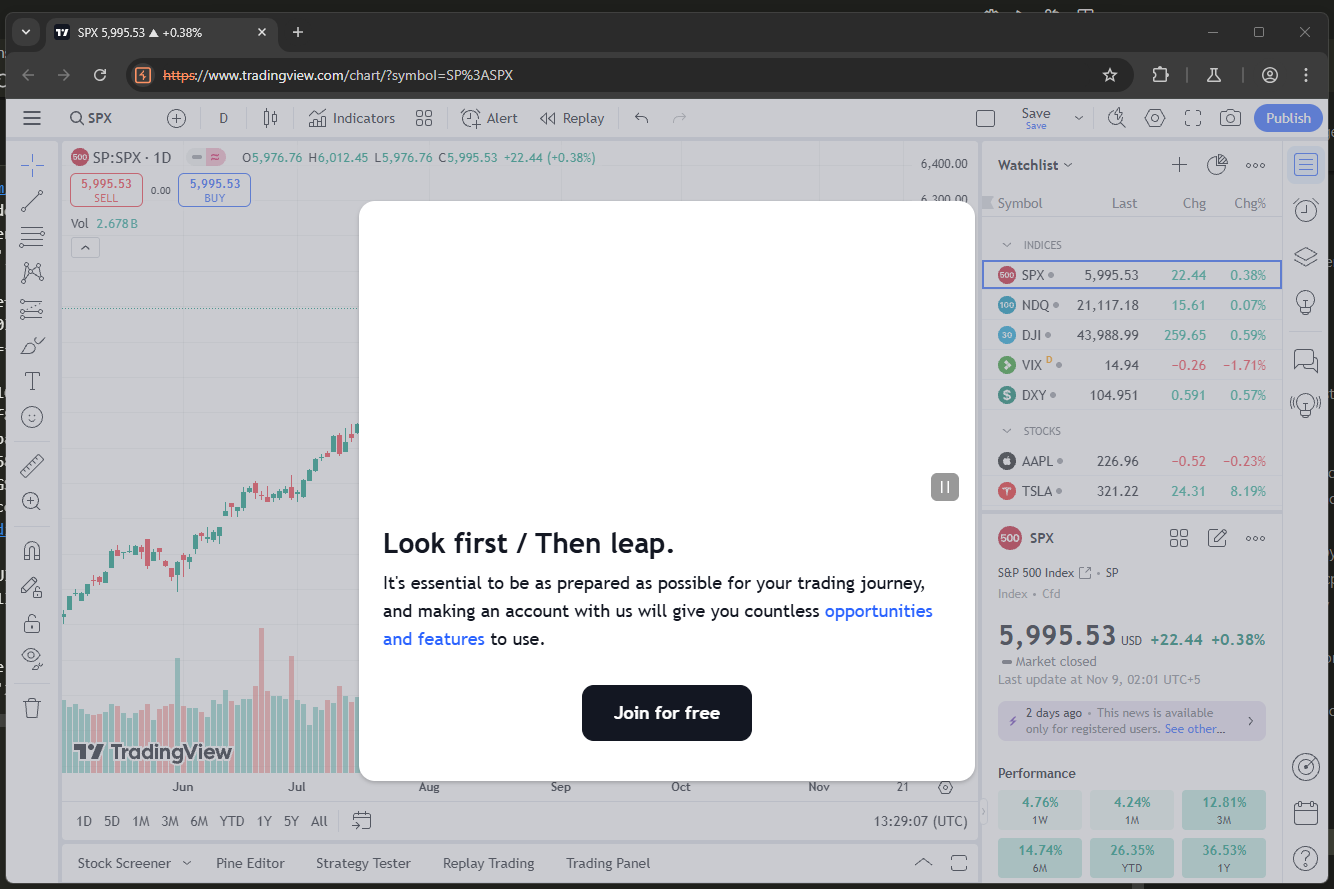

#### Error 
Websocket keeps getting disconnected to mitigate this we need to use proxies and along with a fork of the tvdatafeed that will allow use to dissolve requests obtained from brupsuite to connect and talk with tv especially resembling the browser.